In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the California Housing dataset
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['Price'] = housing.target

print("Dataset loaded successfully!")
df.head()

Dataset loaded successfully!


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Part 1: Simple Linear Regression
Here, we'll try to predict the house price using only one feature: the median income (MedInc).

Step 1 & 2: Select Features and Split Data
We select our independent variable (X) and dependent variable (y), then split them into training and testing sets

In [2]:
# Select a single feature (X) and the target (y)
X_simple = df[['MedInc']] # Median Income
y_simple = df['Price']

# Split the data into training and testing sets
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(
    X_simple, y_simple, test_size=0.2, random_state=42
)

### Step 3: Fit the Linear Regression Model
Now, we'll create and train our model on the training data.

In [3]:
# Create a Linear Regression model instance
simple_model = LinearRegression()

# Fit the model to the training data
simple_model.fit(X_train_simple, y_train_simple)
print("Simple Linear Regression model fitted successfully.")

Simple Linear Regression model fitted successfully.


### Step 4: Evaluate the Model
We'll use the trained model to make predictions on the test data and evaluate its performance using MAE, MSE, and R².

In [4]:
# Make predictions on the test set
y_pred_simple = simple_model.predict(X_test_simple)

# Evaluate the model
mae_simple = mean_absolute_error(y_test_simple, y_pred_simple)
mse_simple = mean_squared_error(y_test_simple, y_pred_simple)
r2_simple = r2_score(y_test_simple, y_pred_simple)

print(f"Mean Absolute Error (MAE): {mae_simple:.2f}")
print(f"Mean Squared Error (MSE): {mse_simple:.2f}")
print(f"R-squared (R²): {r2_simple:.2f}")

Mean Absolute Error (MAE): 0.63
Mean Squared Error (MSE): 0.71
R-squared (R²): 0.46


### Step 5: Plot Regression Line and Interpret Coefficients
Let's visualize the model's predictions and interpret what it has learned.

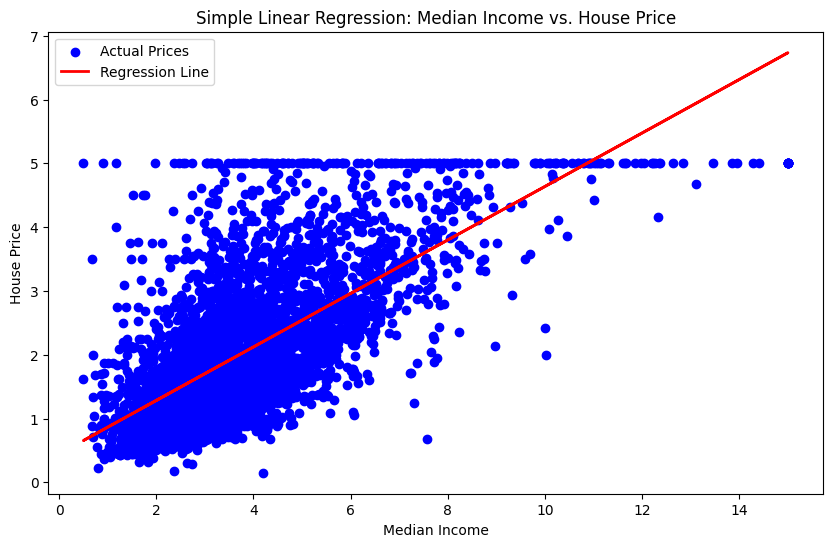

Coefficient (slope): 0.42
Intercept: 0.44


In [5]:
# Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test_simple, y_test_simple, color='blue', label='Actual Prices')
plt.plot(X_test_simple, y_pred_simple, color='red', linewidth=2, label='Regression Line')
plt.title('Simple Linear Regression: Median Income vs. House Price')
plt.xlabel('Median Income')
plt.ylabel('House Price')
plt.legend()
plt.show()

# Interpret the coefficients
print(f"Coefficient (slope): {simple_model.coef_[0]:.2f}")
print(f"Intercept: {simple_model.intercept_:.2f}")

Interpretation: The model learned a coefficient of about 0.42. This means for every one-unit increase in Median Income, the predicted house price increases by approximately 0.42 units (or $42,000, since prices are in $100k).

## Part 2: Multiple Linear Regression
Now, let's build a more powerful model using all the available features.

Step 1 & 2: Select Features and Split Data
This time, X will include all the feature columns.

In [6]:
# Select all features (X) and the target (y)
X_multi = df.drop('Price', axis=1)
y_multi = df['Price']

# Split the data
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42
)

In [ ]:
# Step 3: Fit the Model

multi_model = LinearRegression()
multi_model.fit(X_train_multi, y_train_multi)
print("Multiple Linear Regression model fitted successfully.")

Multiple Linear Regression model fitted successfully.


In [ ]:
### Step 4: Evaluate the Model
# Let's see if using more features improved our R² score.

# Make predictions and evaluate
y_pred_multi = multi_model.predict(X_test_multi)
mae_multi = mean_absolute_error(y_test_multi, y_pred_multi)
mse_multi = mean_squared_error(y_test_multi, y_pred_multi)
r2_multi = r2_score(y_test_multi, y_pred_multi)

print(f"Mean Absolute Error (MAE): {mae_multi:.2f}")
print(f"Mean Squared Error (MSE): {mse_multi:.2f}")
print(f"R-squared (R²): {r2_multi:.2f}")




Mean Absolute Error (MAE): 0.53
Mean Squared Error (MSE): 0.56
R-squared (R²): 0.58


Observation: The R² score (e.g., around 0.59) is significantly higher than the simple model's R² (around 0.47), indicating that this model explains more of the variance in house prices.

In [ ]:
###Step 5: Interpret Coefficients
# We can't plot a single line for multiple features, but we can examine the coefficients for each feature.

# Create a DataFrame for the coefficients
coeffs = pd.DataFrame(multi_model.coef_, X_multi.columns, columns=['Coefficient'])
print(coeffs)



            Coefficient
MedInc         0.448675
HouseAge       0.009724
AveRooms      -0.123323
AveBedrms      0.783145
Population    -0.000002
AveOccup      -0.003526
Latitude      -0.419792
Longitude     -0.433708


Interpretation: This DataFrame shows how much the house price is predicted to change for a one-unit increase in each feature, assuming all other features are held constant. For example, MedInc still has a strong positive coefficient, while AveRooms might have a smaller one.